In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import pathlib

Load data 

In [2]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)

In [3]:
print(os.path.abspath(os.path.join(os.getcwd(), '../Scripts')))

c:\Imane_BENZEGUNINE\project\Logistic_Anlalysis_project\Scripts


In [4]:
from paths import PATH_AUTO_CSV

In [5]:
data= pd.read_csv(PATH_AUTO_CSV) 

In [6]:
data

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,NaN,60.1,285,1
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,NaN,99.2,260,0
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,NaN,71.6,270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-07-22 16:30:00,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,2024-04-30 04:58:58,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0
997,2024-10-27 22:09:13,Truck_2,-71.0609,75.3714,347,In Transit,21.0,63.1,Detour,35,382,5,NaN,74.8,275,0
998,2024-04-18 23:06:56,Truck_2,-76.7910,18.3631,276,Delivered,18.0,64.3,Heavy,10,361,5,NaN,88.6,242,1


In [11]:
print(data.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1000 non-null   object 
 1   Asset_ID                 1000 non-null   object 
 2   Latitude                 1000 non-null   float64
 3   Longitude                1000 non-null   float64
 4   Inventory_Level          1000 non-null   int64  
 5   Shipment_Status          1000 non-null   object 
 6   Temperature              1000 non-null   float64
 7   Humidity                 1000 non-null   float64
 8   Traffic_Status           1000 non-null   object 
 9   Waiting_Time             1000 non-null   int64  
 10  User_Transaction_Amount  1000 non-null   int64  
 11  User_Purchase_Frequency  1000 non-null   int64  
 12  Logistics_Delay_Reason   737 non-null    object 
 13  Asset_Utilization        1000 non-null   float64
 14  Demand_Forecast          

In [15]:
data.isnull().sum()

Timestamp                    0
Asset_ID                     0
Latitude                     0
Longitude                    0
Inventory_Level              0
Shipment_Status              0
Temperature                  0
Humidity                     0
Traffic_Status               0
Waiting_Time                 0
User_Transaction_Amount      0
User_Purchase_Frequency      0
Logistics_Delay_Reason     263
Asset_Utilization            0
Demand_Forecast              0
Logistics_Delay              0
dtype: int64

### Data Cleaning Steps

In [16]:
data.fillna({'Logistics_Delay_Reason': 'Unknown'}, inplace=True)  # Fill missing reasons

In [17]:
data.isnull().sum()

Timestamp                  0
Asset_ID                   0
Latitude                   0
Longitude                  0
Inventory_Level            0
Shipment_Status            0
Temperature                0
Humidity                   0
Traffic_Status             0
Waiting_Time               0
User_Transaction_Amount    0
User_Purchase_Frequency    0
Logistics_Delay_Reason     0
Asset_Utilization          0
Demand_Forecast            0
Logistics_Delay            0
dtype: int64

In [20]:
data = data.astype({col: 'category' for col in data.select_dtypes(include='object')})

In [23]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6128\2392328661.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shipment_Status', data=data, palette='coolwarm')


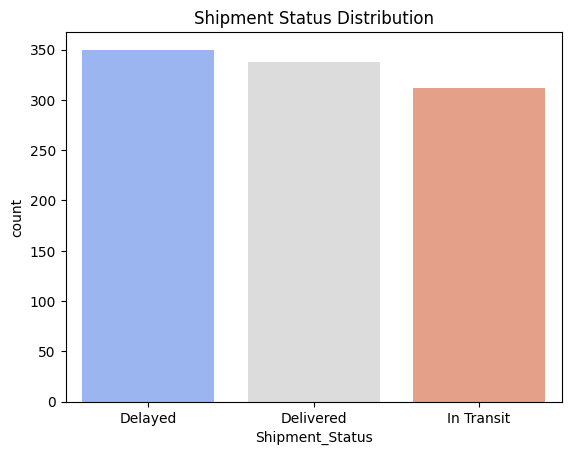

In [24]:
sns.countplot(x='Shipment_Status', data=data, palette='coolwarm')
plt.title("Shipment Status Distribution")
plt.show()


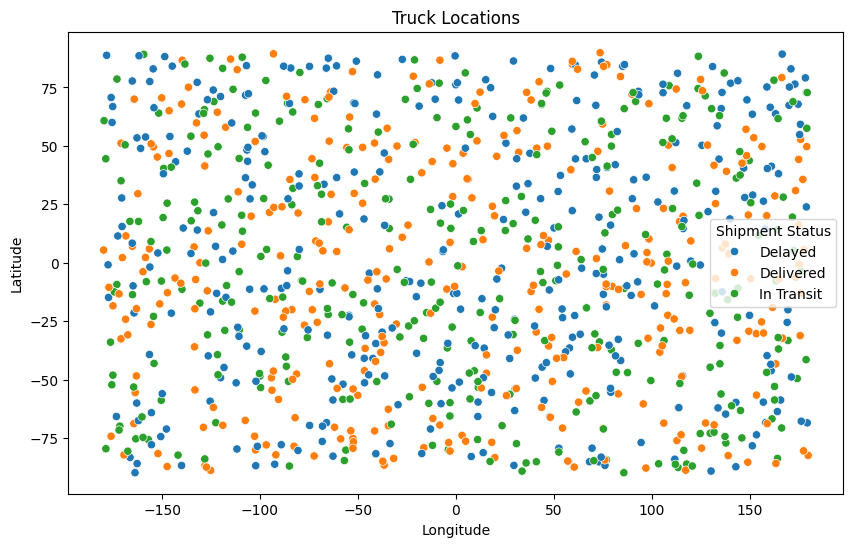

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Longitude'], y=data['Latitude'], hue=data['Shipment_Status'])
plt.title("Truck Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Shipment Status")
plt.show()


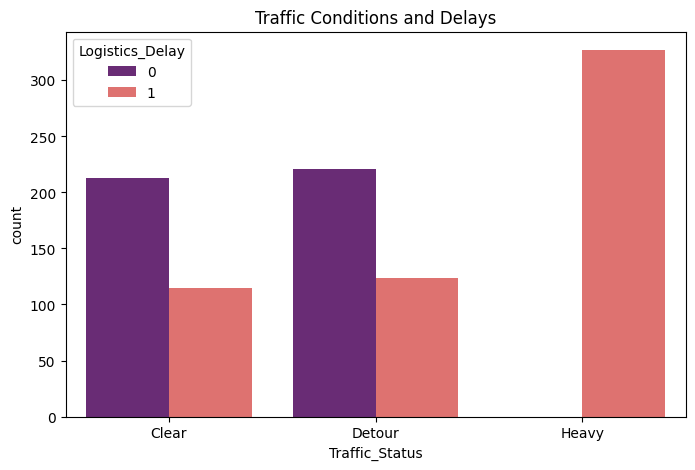

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Traffic_Status", hue="Logistics_Delay", data=data, palette="magma")
plt.title("Traffic Conditions and Delays")
plt.show()

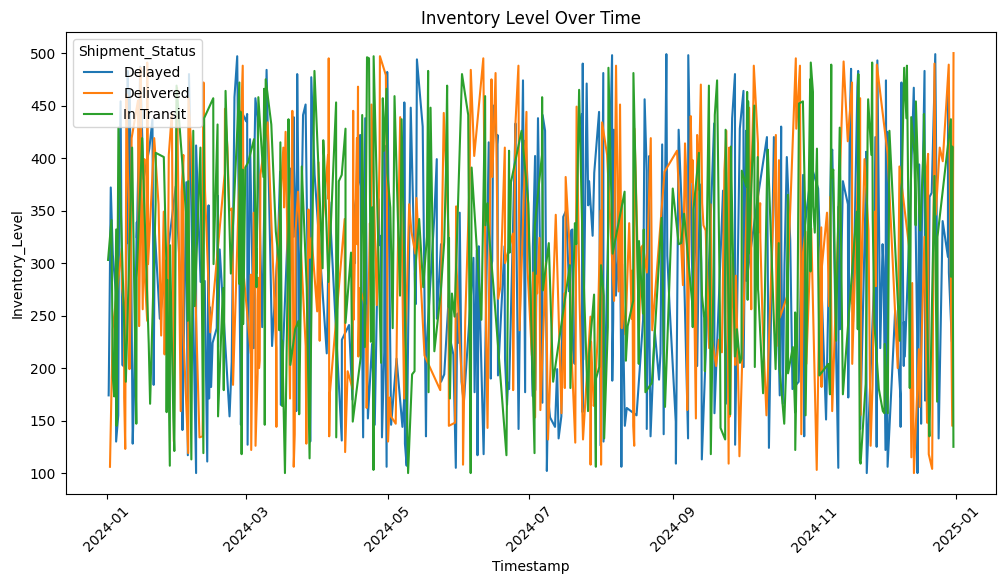

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['Timestamp'], y=data['Inventory_Level'], hue=data['Shipment_Status'])
plt.title("Inventory Level Over Time")
plt.xticks(rotation=45)
plt.show()
